# **Detecção de desfoque - Localizando imagens com foco**

### Para detectar o desfoque, basta convolver com o kernel Laplaciano.

Pegamos a escala de cinza de uma imagem e a convolvemos com o kernel Laplaciano (kernel 3 x 3):

Para quantificar o desfoque, pegamos a variação do resultado da resposta.

O Laplaciano é a segunda derivada de uma imagem e, portanto, destaca as áreas de uma imagem que contêm mudanças rápidas de intensidade. Por isso, ele é usado na detecção de bordas. 

Uma alta variação deve, em teoria, indicar a presença de bordas e não bordas (daí a ampla faixa de valores que resulta em uma alta variação), o que é típico de uma imagem normal em foco. 

Uma variação baixa, portanto, pode significar muito poucas bordas na imagem, o que significa que ela pode estar borrada, pois quanto mais borrão presente, menos bordas existem.

In [1]:
import cv2
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

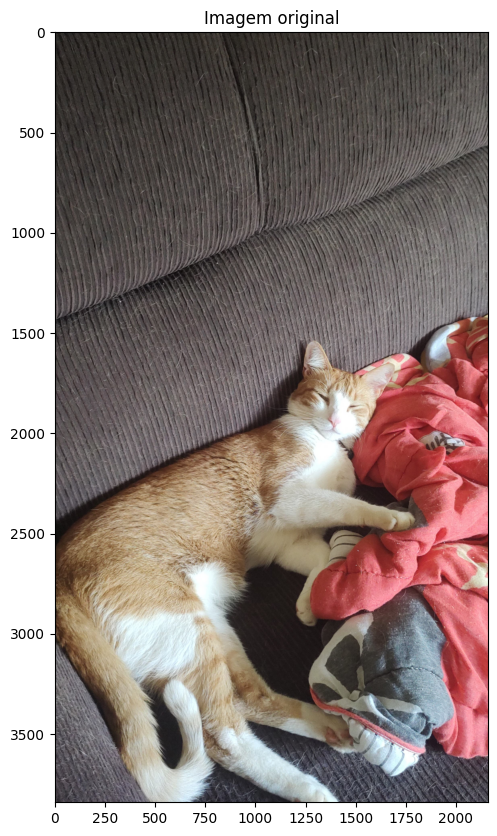

In [2]:
imagem = cv2.imread('../../images/PatricioGatoNenudo.jpg')

imshow("Imagem original", imagem)

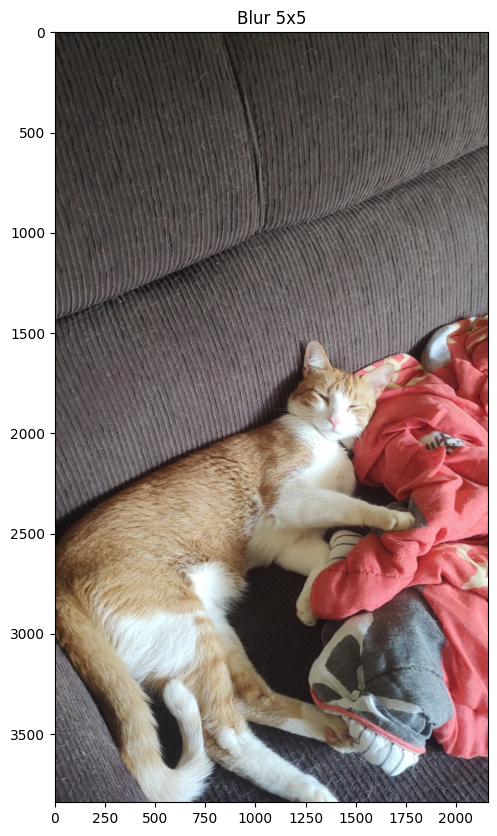

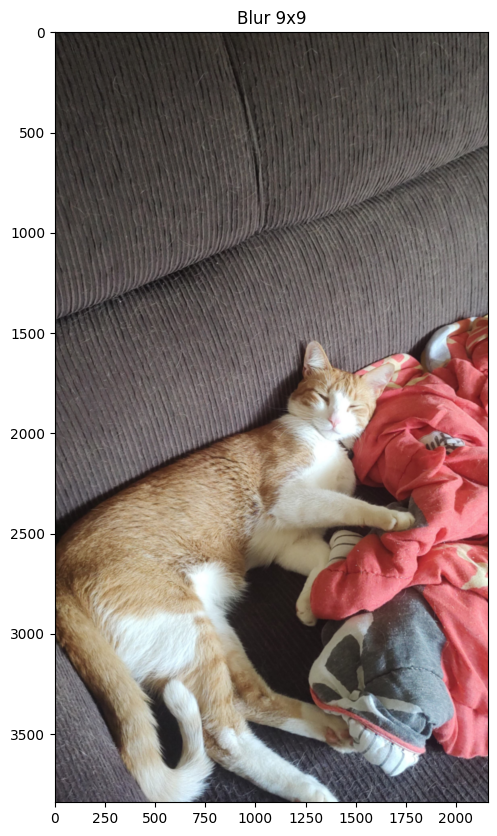

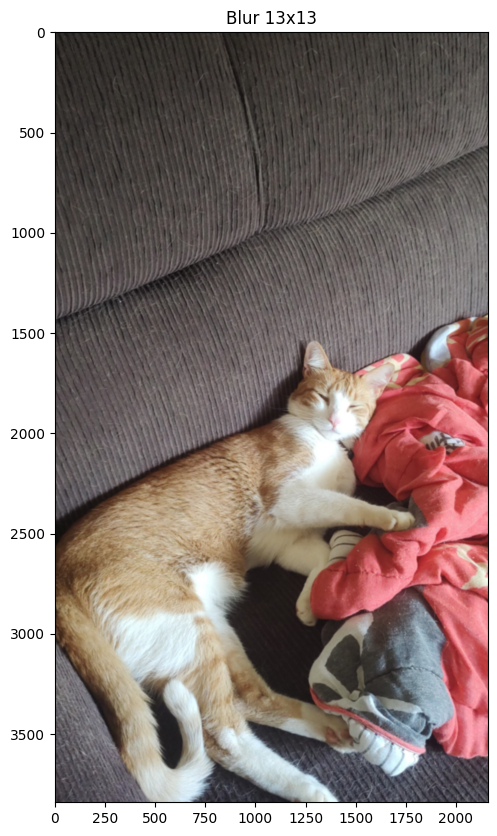

In [4]:
blur1 = cv2.GaussianBlur(imagem, (5,5),0)
imshow("Blur 5x5", blur1)
blur2 = cv2.GaussianBlur(imagem, (9,9),0)
imshow("Blur 9x9", blur2)
blur3 = cv2.GaussianBlur(imagem, (13,13),0)
imshow("Blur 13x13", blur3)

In [5]:
def calcularScoreBlur(imagem):
    if len(imagem.shape) == 3:
        cinza = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    #é utilizada para medir a nitidez de uma imagem por meio do cálculo da variância do Laplaciano.
    # cv2.CV_64F: Tipo de dado de saída (64-bit floats), que permite valores negativos (importante para derivadas).
    # O operador Laplaciano (cv2.Laplacian) detecta bordas e variações abruptas de intensidade na imagem. Ele realça regiões de alta frequência (como bordas e texturas).
    # Gera uma matriz onde cada pixel representa a magnitude da segunda derivada espacial. Valores altos indicam bordas nítidas.
    # .var() A variância é uma medida estatística que quantifica a dispersão dos valores. Valores altos indicam grande variação nas bordas (imagem nítida), 
    # enquanto valores baixos sugerem bordas suaves (imagem borrada).
    return cv2.Laplacian(cinza, cv2.CV_64F).var() 


In [6]:
print(f'Original: {calcularScoreBlur(imagem)}')
print(f'Blur 5x5: {calcularScoreBlur(blur1)}')
print(f'Blur 9x9: {calcularScoreBlur(blur2)}')
print(f'Blur 13x13: {calcularScoreBlur(blur3)}')

Original: 119.59431542478961
Blur 5x5: 21.249982155479852
Blur 9x9: 6.904328703480216
Blur 13x13: 3.6773491749221954
